In [148]:
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [149]:
# Function to randomly select an image from the SAMPLE_DATASET directory
def get_random_image(sample_dataset_dir):
    classes = os.listdir(sample_dataset_dir)
    selected_class = random.choice(classes)
    class_dir = os.path.join(sample_dataset_dir, selected_class)
    image_name = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_name)
    print(image_path)
    print(selected_class)
    return image_path, selected_class

In [150]:
# Function to preprocess the image
def preprocess_image(img_path):
    # Load the image (this itself is a printable image)
    loaded_img = image.load_img(img_path, target_size=(224,224))
    # Convert the image to a numpy array
    img = image.img_to_array(loaded_img)
    # Reshape the image to add an extra dimension (batch size dimension)
    array_image = np.expand_dims(img, axis=0)
    # Normalize the image to the range [0, 1]
    array_image = array_image / 255.0
    return loaded_img, array_image

In [151]:
# Display The Image
def display_image(img, category):
    "Give a loaded image and its category"
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.title(f"Chosen Image Actual Category: {category}")  
    plt.axis('off')
    plt.show()  

In [152]:
def bring_predict_probas(predictions):
    
    class_labels = {
    'BABY_PRODUCTS': 0,
    'BEAUTY_HEALTH': 1,
    'CLOTHING_ACCESSORIES_JEWELLERY': 2,
    'ELECTRONICS': 3,
    'GROCERY': 4,
    'HOBBY_ARTS_STATIONERY': 5,
    'HOME_KITCHEN_TOOLS': 6,
    'PET_SUPPLIES': 7,
    'SPORTS_OUTDOOR': 8,
    }

    # Create a reverse mapping
    reverse_class_labels = {v: k for k, v in class_labels.items()}

    # Flatten the predictions array and sort the probabilities along with their indices
    predictions = predictions.flatten()
    sorted_indices = np.argsort(predictions)[::-1]  # Sort in descending order

    # Get sorted class labels and their corresponding probabilities
    sorted_class_labels = [reverse_class_labels[i] for i in sorted_indices]
    sorted_probabilities = np.round(predictions[sorted_indices], 2)

    # Create a DataFrame
    df = pd.DataFrame({
        'Class': sorted_class_labels,
        'Probability': sorted_probabilities
    })

    return df

In [153]:
def predict(model_path, image_path, category):
    # process the image
    loaded_image, array_image_4d = preprocess_image(image_path)
    # Display the Image and its category to the users
    display_image(loaded_image, category)
    # print an empty line
    print()
    # load the model
    model = load_model(model_path)
    predictions = model.predict(array_image_4d)
    predict_probas_df = bring_predict_probas(predictions)
    print(f"Models Prediction: {predict_probas_df.loc[0, 'Class']}")
    return predict_probas_df

../DEPLOYMENT\SAMPLE_DATASET\SPORTS_OUTDOOR\Spo_32_IME_Walmart_ORJ.jpeg
SPORTS_OUTDOOR


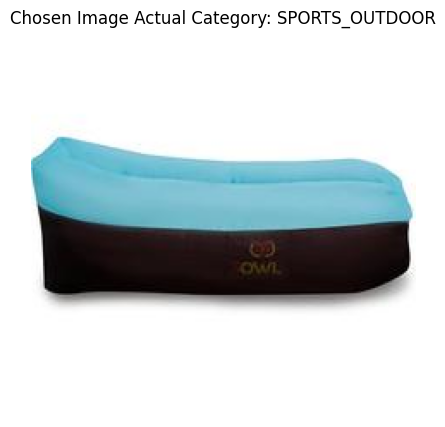

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
Models Prediction: SPORTS_OUTDOOR


,Class,Probability
0,SPORTS_OUTDOOR,0.84
1,PET_SUPPLIES,0.11
2,ELECTRONICS,0.02
3,HOBBY_ARTS_STATIONERY,0.01
4,GROCERY,0.01
5,CLOTHING_ACCESSORIES_JEWELLERY,0.01
6,HOME_KITCHEN_TOOLS,0.00
7,BABY_PRODUCTS,0.00
8,BEAUTY_HEALTH,0.00


In [157]:
model_path = '../DEPLOYMENT\mobilenetv2_18K_model.h5'
image_pool_path = '../DEPLOYMENT\SAMPLE_DATASET'
image_path, category = get_random_image(image_pool_path)
predict(model_path, image_path, category)